## 背景
在竞争激烈的市场环境下，企业必须不断优化自己的服务和产品，以满足不同用户的需求。预测用户是否会升级是一种非常重要的策略，可以帮助企业提前做好准备，并为潜在升级用户提供特别优惠和诱因，以提高成功升级的机会。此外，预测可以帮助企业优化资源分配，将更多精力和资源用于那些有较高潜力的用户身上，提高资源利用效率。通过提供个性化的服务和解决用户痛点，预测也能够增强用户的满意度和忠诚度。最重要的是，升级用户通常意味着更高的收益和利润。通过预测升级潜力，企业可以确定哪些用户有较高的升级潜力，从而加强与这些用户的关系，实现收益的增长。总之，预测用户是否会升级对企业来说是非常有必要的，可以帮助企业提前制定策略、优化资源分配、提高用户满意度和忠诚度，以及实现收益的增长。

## 数据
数据在 train.csv（训练集） 和 test.csv（测试集） 两个文件中，部分字段已脱敏处理。<br>

训练集：包含4000条数据，每行数据有20个字段，‘高价值倾向’为标签，其余字段为特征。<br>

|	|高价值倾向	|地区	|资费等级	|工作类型	|性别	|缴费方式	|收费方式	|Var1	|Var2	|Var3	|Var4	|Var5	|Var6	|Var7	|Var8	|Var9	|Var10	|Var11	|Var12	|Var13|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|0	|是	|北部	|中	|私企	|男	|现金	|预交	|0	|34.21	|1	|1522	|1131	|1071	|2	|1	|242	|44	|1121	|261	|49|
|1	|是	|中部	|中	|无业	|女	|现金	|预交	|0	|20.07	|1	|3058	|1256	|1180	|2	|2	|85	|45	|206	|94	|39|
|2	|是	|南部	|低	|国企	|女	|线上	|预交	|3	|20.27	|1	|16800	|1061	|1020	|1	|1	|182	|58	|429	|169	|49|
|3	|是	|中部	|低	|私企	|女	|现金	|预交	|3	|30.96	|1	|2348	|485	|441	|1	|1	|9	|34	|20	|6	|35|
|4	|是	|中部	|高	|私企	|男	|线上	|预交	|0	|52.77	|1	|4429	|550	|490	|2	|1	|376	|38	|932	|377	|53|

测试集：包含1000条数据，每行数据有19个字段，数据全部为特征。<br>

| |客户ID	|地区	|资费等级	|工作类型	|性别	|缴费方式	|收费方式	|Var1	|Var2	|Var3	|Var3	|Var5	|Var6	|Var7	|Var8	|Var9	|Var10	|Var11	|Var12	|Var13	|Var14|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|0	|4974	|北部	|低	|私企	|女	|线上	|预交	|3	|54.96	|2	|10209	|1130	|1045	|1	|1	|41	|41	|146	|65	|40	|NaN|
|1	|4975	|北部	|低	|私企	|男	|线上	|预交	|3	|34.19	|1	|9061	|1311	|1229	|1	|1	|98	|36	|-1	|-1	|-1	|NaN|
|2	|4976	|中部	|中	|无业	|女	|线上	|预交	|0	|22.55	|1	|2275	|253	|215	|2	|1	|15	|23	|33	|19	|26	|NaN|
|3	|4977	|北部	|高	|无业	|女	|线上	|预交	|3	|31.43	|1	|2650	|827	|793	|2	|2	|337	|101	|1194	|299	|117	|NaN|
|4	|4978	|北部	|低	|私企	|男	|现金	|预交	|3	|31.33	|2	|2585	|245	|180	|1	|2	|73	|34	|276	|72	|32|	NaN|

## 分析思路
1.数据探索。对数据大小、形状、数据类型、描述性统计量等进行查看，检查缺失值和重复值并对其做删除或填充处理。<br>
2.特征探索。对连续变量和离散变量分别进行探索，用图像展示和统计学推断等方式对数据做进一步的了解。<br>
3.特征工程。对连续喝离散变量分别进行编码、归一化和降维等操作。<br>
4.模型训练。查看单模型准确率。<br>
5.模型优化。对逻辑回归模型进行网格化调参。<br>
6.模型预测。训练自己的模型，并将对测试集标签的预测结果进行保存。

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文
plt.rcParams['axes.unicode_minus'] = False # 显示负号

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 数据探索

In [64]:
# 定义训练集和测试集的路径
train_path = './train.csv'
test_path = './test.csv'

# 从 CSV 文件中读取训练集和测试集数据，并将编码设置为 utf-8
train = pd.read_csv(train_path, encoding='utf-8') # 训练集
test = pd.read_csv(test_path, encoding='utf-8') # 测试集

# 打印训练集和测试集的前五行数据，以确保数据已经正确加载
print(train.head())
print(test.head())

   客户ID 高价值倾向  地区 资费等级 工作类型 性别 缴费方式 收费方式  Var1   Var2  ...  Var5  Var6  Var7  \
0  1000     是  北部    中   私企  男   现金   预交     0  34.21  ...  1131  1071     2   
1  1001     是  中部    中   无业  女   现金   预交     0  20.07  ...  1256  1180     2   
2  1002     是  南部    低   国企  女   线上   预交     3  20.27  ...  1061  1020     1   
3  1007     是  中部    低   私企  女   现金   预交     3  30.96  ...   485   441     1   
4  1014     是  中部    高   私企  男   线上   预交     0  52.77  ...   550   490     2   

   Var8  Var9  Var10  Var11  Var12  Var13  Var14  
0     1   242     44   1121    261     49    0.0  
1     2    85     45    206     94     39    0.0  
2     1   182     58    429    169     49    0.0  
3     1     9     34     20      6     35    1.0  
4     1   376     38    932    377     53    1.0  

[5 rows x 22 columns]
   客户ID  地区 资费等级 工作类型 性别 缴费方式 收费方式  Var1   Var2  Var3  ...  Var5  Var6  Var7  \
0  4974  北部    低   私企  女   线上   预交     3  54.96     2  ...  1130  1045     1   
1  4975  北部    低   私企  男   线上 

In [65]:
# 对训练集和测试集数据进行描述性统计分析，并打印结果
train.describe(), test.describe()

(             客户ID         Var1         Var2         Var3           Var4  \
 count  4000.00000  4000.000000  4000.000000  4000.000000    4000.000000   
 mean   3002.90550     1.491000    35.546080     1.482500    7551.116750   
 std    1161.80073     1.500161    12.325856     0.499756    7712.796037   
 min    1000.00000     0.000000    20.010000     1.000000       0.000000   
 25%    1999.75000     0.000000    23.847500     1.000000    2623.000000   
 50%    2999.50000     0.000000    32.390000     1.000000    5348.500000   
 75%    3999.25000     3.000000    50.930000     2.000000    9896.250000   
 max    5999.00000     3.000000   123.440000     2.000000  107547.000000   
 
               Var5          Var6         Var7         Var8         Var9  \
 count   4000.00000   4000.000000  4000.000000  4000.000000  4000.000000   
 mean    1009.87400    939.633250     1.525750     1.535250   175.723000   
 std      790.45767    781.083995     0.499399     0.498818   180.187834   
 min      

In [66]:
# 打印训练集和测试集数据的基本信息
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   客户ID    4000 non-null   int64  
 1   高价值倾向   4000 non-null   object 
 2   地区      3996 non-null   object 
 3   资费等级    4000 non-null   object 
 4   工作类型    4000 non-null   object 
 5   性别      4000 non-null   object 
 6   缴费方式    4000 non-null   object 
 7   收费方式    4000 non-null   object 
 8   Var1    4000 non-null   int64  
 9   Var2    4000 non-null   float64
 10  Var3    4000 non-null   int64  
 11  Var4    4000 non-null   int64  
 12  Var5    4000 non-null   int64  
 13  Var6    4000 non-null   int64  
 14  Var7    4000 non-null   int64  
 15  Var8    4000 non-null   int64  
 16  Var9    4000 non-null   int64  
 17  Var10   4000 non-null   int64  
 18  Var11   4000 non-null   int64  
 19  Var12   4000 non-null   int64  
 20  Var13   4000 non-null   int64  
 21  Var14   828 non-null    float64
dtype

(None, None)

<font size=4 color=Blue>知识点1：Pandas缺失值、重复值的检验和处理</font><br>

In [67]:
# 计算训练集和测试集中每一列的缺失值数量
train_null = train.isnull().sum() # 训练集
test_null = test.isnull().sum() # 测试集

#print('训练集缺失值：\n{}\n\n测试集缺失值：\n{}'.format(train_null,test_null))
train_null, test_null

(客户ID        0
 高价值倾向       0
 地区          4
 资费等级        0
 工作类型        0
 性别          0
 缴费方式        0
 收费方式        0
 Var1        0
 Var2        0
 Var3        0
 Var4        0
 Var5        0
 Var6        0
 Var7        0
 Var8        0
 Var9        0
 Var10       0
 Var11       0
 Var12       0
 Var13       0
 Var14    3172
 dtype: int64,
 客户ID        0
 地区         21
 资费等级        0
 工作类型        0
 性别          0
 缴费方式        0
 收费方式        0
 Var1        0
 Var2        0
 Var3        0
 Var4        0
 Var5        0
 Var6        0
 Var7        0
 Var8        0
 Var9        0
 Var10       0
 Var11       0
 Var12       0
 Var13       0
 Var14    1000
 dtype: int64)

In [68]:
# 计算训练集和测试集中的重复值数量
train_duplicate = train.duplicated().sum() #训练集
test_duplicate = test.duplicated().sum() # 测试集
#print('训练集重复值：\n{}\n\n测试集重复值：\n{}'.format(train_duplicate,test_duplicate))
train_duplicate, test_duplicate

(0, 0)

<font size=4 color=Blue>知识点2：Pandas的按列删除和缺失值填充操作</font><br>

In [69]:
def data_preprocess(data):
    # 删除 '客户ID' 和 'Var14' 列
    data.drop(columns=['客户ID', 'Var14'], inplace=True)
    
    # 使用前向填充方法填补缺失值
    data.ffill(inplace=True)
    # 提取训练集特征
    if '高价值倾向' in data.columns:
        # 如果数据集包含 '高价值倾向' 列，提取特征和标签
        feature = data.drop(columns=['高价值倾向'])
        label = data['高价值倾向']
        return feature, label
    # 提取测试集特征
    else:
        # 如果数据集不包含 '高价值倾向' 列，直接返回数据集
        return data
train_fea, train_lab = data_preprocess(train)
train_fea

,地区,资费等级,工作类型,性别,缴费方式,收费方式,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13
0,北部,中,私企,男,现金,预交,0,34.21,1,1522,1131,1071,2,1,242,44,1121,261,49
1,中部,中,无业,女,现金,预交,0,20.07,1,3058,1256,1180,2,2,85,45,206,94,39
2,南部,低,国企,女,线上,预交,3,20.27,1,16800,1061,1020,1,1,182,58,429,169,49
3,中部,低,私企,女,现金,预交,3,30.96,1,2348,485,441,1,1,9,34,20,6,35
4,中部,高,私企,男,线上,预交,0,52.77,1,4429,550,490,2,1,376,38,932,377,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,南部,高,国企,女,现金,预交,3,53.08,1,1699,371,311,1,1,54,35,342,66,35
3996,北部,中,国企,女,线上,预交,0,24.19,1,2098,650,611,1,2,150,93,425,144,66
3997,南部,低,国企,女,线上,预交,3,22.02,2,4324,738,681,2,1,223,66,639,234,63
3998,中部,低,私企,女,线上,预交,0,33.60,1,4039,374,353,1,1,44,54,334,53,62


In [70]:
test_fea = data_preprocess(test)
test_fea

,地区,资费等级,工作类型,性别,缴费方式,收费方式,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13
0,北部,低,私企,女,线上,预交,3,54.96,2,10209,1130,1045,1,1,41,41,146,65,40
1,北部,低,私企,男,线上,预交,3,34.19,1,9061,1311,1229,1,1,98,36,-1,-1,-1
2,中部,中,无业,女,线上,预交,0,22.55,1,2275,253,215,2,1,15,23,33,19,26
3,北部,高,无业,女,线上,预交,3,31.43,1,2650,827,793,2,2,337,101,1194,299,117
4,北部,低,私企,男,现金,预交,3,31.33,2,2585,245,180,1,2,73,34,276,72,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,中部,中,无业,男,线上,预交,3,23.41,2,3852,1145,1110,2,2,0,8,0,0,8
996,中部,高,无业,女,现金,预交,3,31.13,2,7130,1373,1316,2,1,326,67,660,284,61
997,中部,中,私企,女,现金,预交,3,32.57,2,1730,177,127,1,2,35,35,106,50,36
998,中部,高,私企,女,现金,预交,3,101.50,2,932,468,436,1,1,300,300,20,50,50


### 数据平衡

In [71]:
# 统计标签比例
train_lab.value_counts(normalize=True)

否    0.83425
是    0.16575
Name: 高价值倾向, dtype: float64

<font size=4 color=Blue>知识点3：利用imblearn库对不平衡数据进行过（上）采样。</font><br>

### 上采样

In [72]:
# 导入 RandomOverSampler 模块
from imblearn.over_sampling import RandomOverSampler

# 创建 RandomOverSampler 实例，指定随机种子为 0
ros = RandomOverSampler(random_state=0)

# 使用 RandomOverSampler 对训练数据进行过采样，以处理类别不平衡问题
# train_fea 表示训练集特征，train_lab 表示训练集标签
train_fea, train_lab = ros.fit_resample(train_fea, train_lab)

# 统计过采样后的训练集标签值分布情况，输出结果（统计标签比例）
train_lab.value_counts(normalize=True)

是    0.5
否    0.5
Name: 高价值倾向, dtype: float64

## 特征探索

In [73]:
# 类别特征和连续特征
cat = ['地区', '资费等级', '工作类型', '性别', '缴费方式', '收费方式','Var1','Var3', 'Var7', 'Var8', ]
num = ['Var2',  'Var4', 'Var5', 'Var6', 'Var9', 'Var10', 'Var11', 'Var12', 'Var13']

### 连续变量

#### 数据分布

<font size=4 color=Blue>知识点4：核密度估计图和盒子图的绘制，多子图绘制。</font><br>

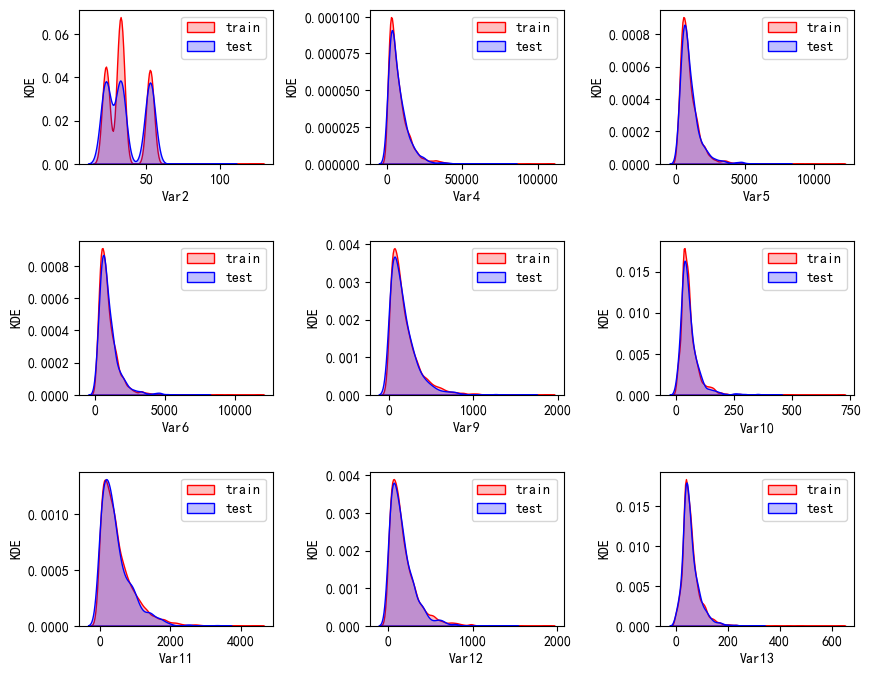

In [74]:
# 导入绘图库和 seaborn 库
import matplotlib.pyplot as plt
import seaborn as sns

# 创建一个大小为 10x8 的绘图窗口
fig = plt.figure(figsize=(10, 8))

# 遍历 num 列表的索引
for i in range(len(num)):
    # 在绘图窗口中创建一个子图，位置为 3x3 网格中的第 i+1 个位置
    ax = plt.subplot(3, 3, i+1)
    
    # 使用 seaborn 库的 kdeplot() 函数绘制核密度估计曲线，红色表示训练集，蓝色表示测试集
    ax = sns.kdeplot(train_fea[num[i]], color="Red", fill=True)
    ax = sns.kdeplot(test_fea[num[i]], color="Blue", fill=True)
    
    # 设置 x 轴标签为 num[i]
    ax.set_xlabel(num[i])
    
    # 设置 y 轴标签为 "KDE"
    ax.set_ylabel("KDE")
    
    # 设置图例为 ["train", "test"]
    ax = ax.legend(["train", "test"])
    
    # 调整子图之间的水平间距和垂直间距为 0.5
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

# 显示绘图窗口
plt.show()

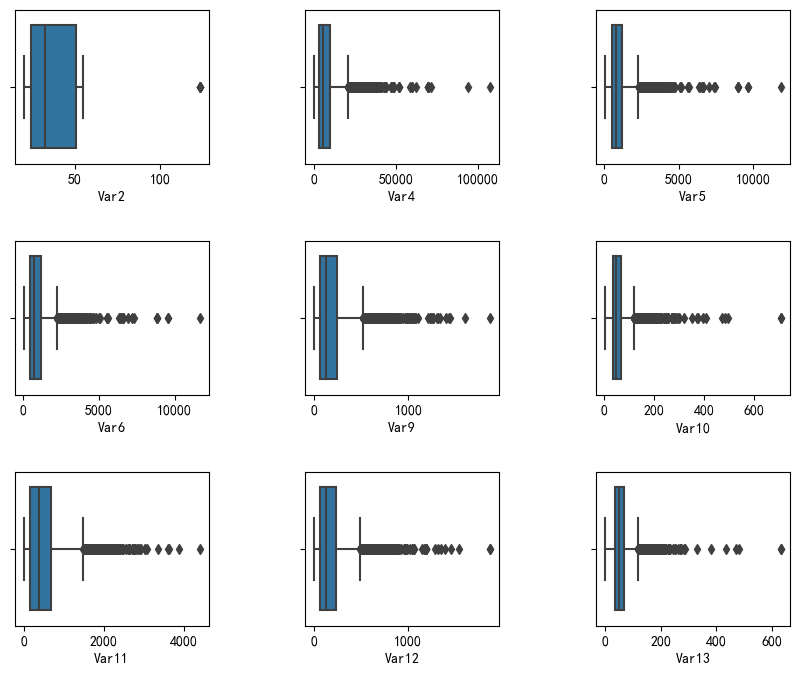

In [75]:
# 导入 seaborn 库
import seaborn as sns

# 创建一个大小为 10x8 的绘图窗口
fig = plt.figure(figsize=(10, 8))

# 遍历 num 列表的索引
for i in range(len(num)):
    # 在绘图窗口中创建一个子图，位置为 3x3 网格中的第 i+1 个位置
    plt.subplot(3, 3, i+1)
    
    # 使用 seaborn 库的 boxplot() 函数绘制箱线图，x 轴为 train_fea[num[i]] 数据
    sns.boxplot(x=train_fea[num[i]])
    
    # 调整子图之间的水平间距和垂直间距为 0.5
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

# 显示绘图窗口
plt.show()

<font size=4 color=Blue>知识点5：利用Pandas库进行相关系数的计算；利用statsmodels库的方差膨胀因子进行多重共线性检验；利用sklearn的VarianceThreshold进行方差阈值检验。</font><br>

#### 相关性

<AxesSubplot:>

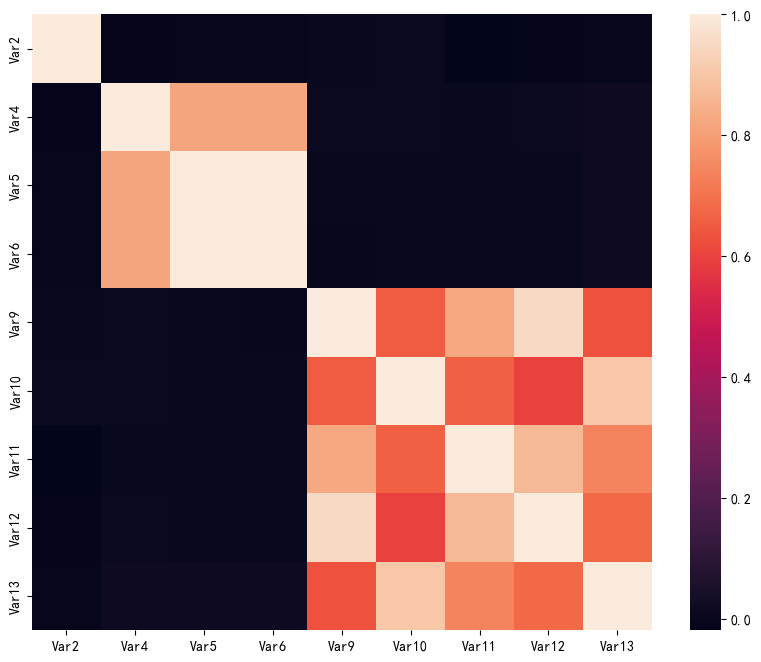

In [76]:
# 导入 seaborn 库
import seaborn as sns

# 创建一个大小为 10x8 的绘图窗口
plt.figure(figsize=(10, 8))

# 计算特征 num 的相关系数矩阵
corr = train_fea[num].corr()

# 使用 seaborn 库的 heatmap() 函数绘制相关系数热力图
sns.heatmap(corr)

#### 多重共线性

In [77]:
# 从 statsmodels 库中的 outliers_influence 模块中导入方差膨胀因子函数
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 创建一个空的 DataFrame
vif = pd.DataFrame()

# 在 DataFrame 中创建一个名为 'index' 的列，并将特征 num 存入该列
vif['index'] = num

# 在 DataFrame 中创建一个名为 'VIF' 的列，计算各个特征的方差膨胀因子并存入该列
vif['VIF'] = [variance_inflation_factor(train_fea[num].values, i) for i in range(train_fea[num].shape[1])]

# 打印输出 DataFrame vif
print(vif)

   index         VIF
0   Var2    4.268417
1   Var4    6.056380
2   Var5  827.371894
3   Var6  775.867201
4   Var9   38.808620
5  Var10   31.567389
6  Var11   10.446266
7  Var12   44.031640
8  Var13   37.311919


#### 方差

In [78]:
# 从 sklearn 库中的 feature_selection 模块中导入方差阈值函数
from sklearn.feature_selection import VarianceThreshold

# 创建一个方差阈值对象，设定方差阈值为 0.0
vt = VarianceThreshold(threshold=0.0)

# 对特征 num 进行方差阈值处理
vt.fit_transform(train_fea[num])

# 获取被保留的特征名
fea_num = vt.feature_names_in_

# 获取每个特征的方差值
variance = vt.variances_

# 创建一个 DataFrame，存储被保留的特征名和方差值
columns = ['feature', 'variance']
pd.DataFrame(np.vstack((fea_num, variance)).T, columns=columns)

,feature,variance
0,Var2,103.43
1,Var4,107547.0
2,Var5,11822.0
3,Var6,11623.0
4,Var9,1872.0
5,Var10,704.0
6,Var11,4409.0
7,Var12,1880.0
8,Var13,635.0


### 离散变量

<font size=4 color=Blue>知识点6：Seaborn库计数图的绘制，sklearn库卡方检验。</font><br>

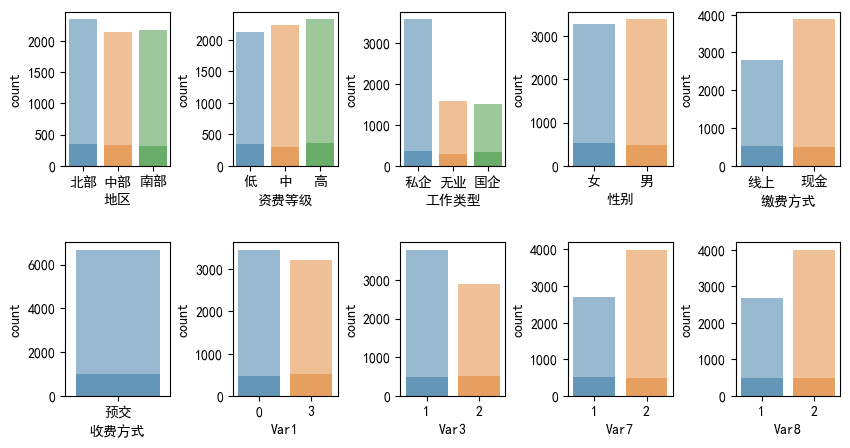

In [79]:
# 从 seaborn 库中导入 sns 并设置样式
import seaborn as sns

# 创建一个大小为 10x8 的图形对象
fig = plt.figure(figsize=(10, 8))

# 遍历 cat 列表中的每个元素
for i in range(len(cat)):
    # 在 2x5 的子图中的第 i+1 个位置创建子图
    plt.subplot(2, 5, i+1)
    
    # 绘制训练集中 cat[i] 特征的计数柱状图，并设置透明度为 0.5
    sns.countplot(x=cat[i], data=train_fea, alpha=0.5)
    
    # 绘制测试集中 cat[i] 特征的计数柱状图，并设置透明度为 0.5
    sns.countplot(x=cat[i], data=test_fea, alpha=0.5)
    
    # 调整子图之间的水平和垂直间距以及底部边距
    plt.subplots_adjust(wspace=0.6, hspace=0.5, bottom=0.4)
    
# 显示图形
plt.show()

#### 卡方分布

In [80]:
# 从 sklearn.feature_selection 库中导入 chi2 方法，用于特征选择
from sklearn.feature_selection import chi2

# 从 sklearn.preprocessing 库中导入 OrdinalEncoder，用于顺序编码
from sklearn.preprocessing import OrdinalEncoder

# 创建一个顺序编码器对象
ode = OrdinalEncoder()

# 使用顺序编码器对训练集中的分类变量进行编码，并将结果赋值给 chi_train_cat
chi_train_cat = ode.fit_transform(train_fea[cat])

# 使用 chi2 方法计算分类变量和目标变量之间的卡方统计量和 p 值
chi, p = chi2(chi_train_cat, train_lab)

# 创建一个 DataFrame，包含卡方统计量和 p 值
columns = ['卡方统计量', 'P值']
pd.DataFrame(np.vstack((chi, p)).T, columns=columns)

,卡方统计量,P值
0,0.193202,6.602648e-01
1,0.028513,8.659078e-01
2,414.008240,4.916384e-92
3,0.007620,9.304406e-01
4,73.569659,9.714652e-18
5,NaN,NaN
6,5.414543,1.996968e-02
7,79.752154,4.244475e-19
8,121.590361,2.837774e-28
9,99.856000,1.638901e-23


## 特征工程

In [81]:
# 按照特征探索重新选取新的特征
num = ['Var4', 'Var5', 'Var6', 'Var9', 'Var10', 'Var11', 'Var12', 'Var13']
cat = ['地区', '资费等级', '工作类型', '性别', '缴费方式', 'Var1', 'Var3', 'Var7', 'Var8']

In [82]:
# 将数值特征和类别特征重新拼接
train_fea = train_fea[num + cat]
train_fea

,Var4,Var5,Var6,Var9,Var10,Var11,Var12,Var13,地区,资费等级,工作类型,性别,缴费方式,Var1,Var3,Var7,Var8
0,1522,1131,1071,242,44,1121,261,49,北部,中,私企,男,现金,0,1,2,1
1,3058,1256,1180,85,45,206,94,39,中部,中,无业,女,现金,0,1,2,2
2,16800,1061,1020,182,58,429,169,49,南部,低,国企,女,线上,3,1,1,1
3,2348,485,441,9,34,20,6,35,中部,低,私企,女,现金,3,1,1,1
4,4429,550,490,376,38,932,377,53,中部,高,私企,男,线上,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,5163,346,267,266,55,402,216,49,北部,中,私企,女,线上,0,1,1,2
6670,16800,1061,1020,182,58,429,169,49,南部,低,国企,女,线上,3,1,1,1
6671,8285,791,758,46,41,86,48,41,中部,低,私企,男,线上,0,2,2,2
6672,5404,798,718,101,42,303,81,37,北部,高,私企,女,线上,3,1,2,2


<font size=4 color=Blue>知识点7：标签编码、独热编码、最大-最小值归一化，PCA降维。</font><br>

#### PCA降维

In [83]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# 创建一个 LabelEncoder 对象 le，并使用它对训练集中的目标变量进行编码
le = LabelEncoder()
train_lab = le.fit_transform(train_lab) # 训练转换

# 定义一个函数 fea_process，用于特征处理
def fea_process(data, train_fea):
    # 创建一个 OneHotEncoder 对象 ohe，并使用它对分类变量进行独热编码
    ohe = OneHotEncoder()
    ohe = ohe.fit(train_fea[cat]) # 对训练集做训练
    data_cat = ohe.transform(data[cat]) # 转换
    
    # 创建一个 MinMaxScaler 对象 Mm，并使用它对数值变量进行归一化
    Mm = MinMaxScaler()
    Mm = Mm.fit(train_fea[num]) # 对训练集做训练
    data_num = Mm.transform(data[num]) #转换

    # 创建一个 PCA 对象 pca，并使用它对数值变量进行主成分分析降维
    pca = PCA(n_components=0.999,)
    pca.fit(train_fea[num]) # 对训练集做训练
    data_num = pca.transform(data[num]) # 转换
    
    # 拼接独热编码后的分类变量和主成分分析降维后的数值变量，得到最终的特征矩阵
    data_num_cat = np.concatenate((data_cat.toarray(), data_num),axis=1)
    
    return data_num_cat

In [84]:
train_num_cat = fea_process(train_fea, train_fea)
train_num_cat

array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -5.87428680e+03,  9.00704813e+02,  6.16493256e+02],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.32973797e+03,  8.96552068e+02, -3.07720413e+02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         9.28750719e+03, -9.71671918e+02, -8.27520144e+01],
       ...,
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.87208347e+02, -3.39067326e+02, -4.59678321e+02],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -2.07646343e+03, -2.63247914e+01, -2.32483238e+02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -5.51509687e+03, -3.72470851e+01, -5.02613720e+02]])

In [85]:
test_num_cat = fea_process(test_fea, train_fea)
test_num_cat

array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         2.74995015e+03, -1.26233003e+02, -3.99711780e+02],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         1.64021799e+03,  2.66609771e+02, -5.32024163e+02],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.27099675e+03, -3.90634853e+02, -5.26040098e+02],
       ...,
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.82581758e+03, -4.42760081e+02, -4.44211368e+02],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -6.56836993e+03,  7.14128997e+01, -4.20924346e+02],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.37599167e+03, -2.34738878e+02, -3.37653239e+02]])

## 模型训练

<font size=4 color=Blue>知识点8：sklearn库中分类模型的调用，训练集和测试集的划分。</font><br>

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

lr = LogisticRegression(solver='saga', random_state=42)  # 创建逻辑回归模型对象
svc = SVC(random_state=42)  # 创建支持向量机模型对象
rfc = RandomForestClassifier(random_state=42)  # 创建随机森林分类器模型对象
knn = KNeighborsClassifier()  # 创建K近邻分类器模型对象
dt = DecisionTreeClassifier(random_state=42)  # 创建决策树分类器模型对象
mlp = MLPClassifier(max_iter=1000, random_state=42)  # 创建多层感知机分类器模型对象
gbdt = GradientBoostingClassifier(random_state=42)  # 创建梯度提升分类器模型对象
abdt = AdaBoostClassifier(random_state=42)  # 创建AdaBoost分类器模型对象

model_list = [lr, svc, knn, dt, mlp, rfc, gbdt, abdt]  # 将模型对象放入一个列表中
X_train, X_vaild, y_train, y_vaild = train_test_split(train_num_cat, train_lab, train_size=0.8, random_state=42)  # 划分训练集和验证集数据

def sing_model(X_train, X_vaild, y_train, y_vaild):
    train_scores = []  # 记录训练集得分的列表
    valid_scores = []  # 记录验证集得分的列表

    for model in model_list:  # 遍历模型列表
        model = model.fit(X_train, y_train)  # 使用当前模型拟合训练集数据
        
        train_score = model.score(X_train, y_train)  # 计算训练集的准确率得分
        vaild_score = model.score(X_vaild, y_vaild)  # 计算验证集的准确率得分
        
        train_scores.append(train_score)  # 将训练集得分添加到列表中
        valid_scores.append(vaild_score)  # 将验证集得分添加到列表中
        
    return train_scores, valid_scores  # 返回训练集得分和验证集得分的列表

train_scores, valid_scores = sing_model(X_train, X_vaild, y_train, y_vaild)  # 调用函数获取训练集得分和验证集得分列表

/root/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


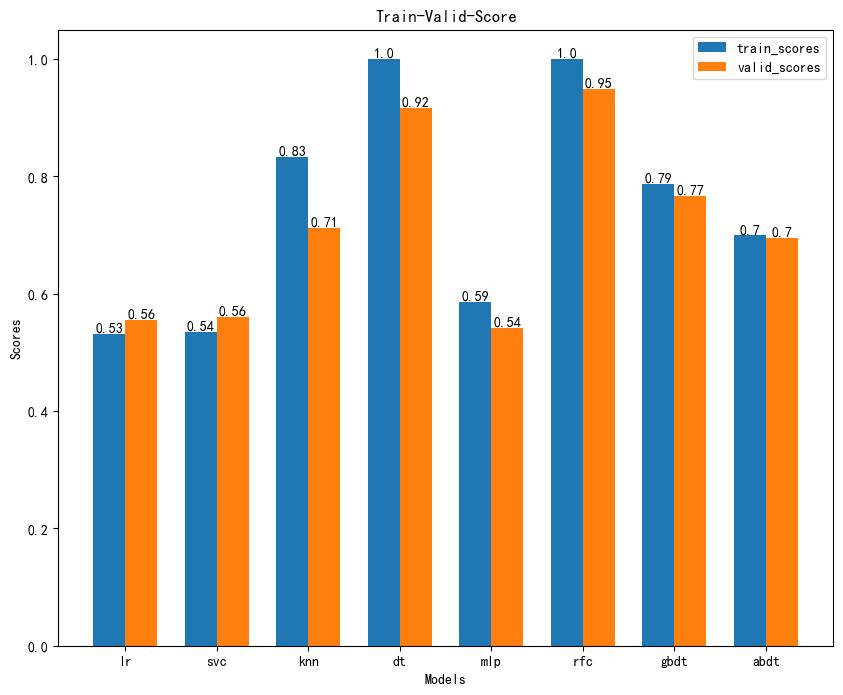

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# 定义标签和得分数据
labels = ['lr', 'svc', 'knn', 'dt', 'mlp', 'rfc', 'gbdt', 'abdt']

# 创建一个大小为 10 x 8 的图形
plt.figure(figsize=(10,8))

# 设置每个柱状图的宽度
bar_width = 0.35

# 计算每个柱状图的中心位置
x = np.arange(len(labels))

# 绘制并列柱状图，train_scores 和 valid_scores 分别表示训练集和验证集的准确率
train_bars = plt.bar(x - bar_width/2, train_scores, bar_width, label='train_scores')
valid_bars = plt.bar(x + bar_width/2, valid_scores, bar_width, label='valid_scores')

# 在柱状图上添加数值标签，使用 round() 函数保留两位小数
for bar in train_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

for bar in valid_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# 添加标签、标题和图例
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Train-Valid-Score')
plt.xticks(x, labels)
plt.legend()

# 显示图形
plt.show()

## 特征优化

<font size=4 color=Blue>知识点9：网格化搜索调参。</font><br>

In [28]:
from sklearn.model_selection import GridSearchCV  # 导入网格搜索交叉验证函数

# 设置逻辑回归模型
lr = LogisticRegression(solver='liblinear', random_state=42)  # 创建逻辑回归模型对象，并指定求解器和随机种子

# 定义要搜索的参数网格
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # 正则化强度的候选值
    'penalty': ['l1', 'l2']  # 惩罚项的候选值
}

# 创建GridSearchCV对象
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=4)  # 创建网格搜索交叉验证对象，使用5折交叉验证，准确率作为评分指标，4个线程并行运行

# 执行网格搜索
grid_search.fit(X_train, y_train)  # 在训练集上执行网格搜索

# 输出最佳参数和对应的准确率
print("Best parameters:", grid_search.best_params_)  # 输出最佳参数
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))  # 输出最佳参数对应的交叉验证准确率得分

# 使用最佳参数在测试集上评估模型性能
best_model = grid_search.best_estimator_  # 获取最佳模型
test_score = best_model.score(X_vaild, y_vaild)  # 在验证集上评估最佳模型的性能
print("Test set score with best parameters: {:.2f}".format(test_score))  # 输出在验证集上使用最佳参数得到的准确率得分


Best parameters: {'C': 0.001, 'penalty': 'l2'}
Best cross-validation score: 0.68
Test set score with best parameters: 0.68


## 以下自由发挥

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


# 定义模型和参数搜索空间
svc = SVC(random_state=42)
parameters = {
    'C': [0.1, 1, 10, 100],  # 调节惩罚系数C的取值范围
    'gamma': [1, 0.1, 0.01, 0.001],  # 核函数的系数 gamma 的取值范围
    'kernel': ['linear', 'rbf', 'poly'],  # 核函数的选择，这里加入了'poly'作为选择项
    'degree': [2, 3, 4]  # 多项式核函数的阶数
}

# 使用 GridSearchCV 进行参数搜索
grid_search = GridSearchCV(svc, parameters, n_jobs=4)
grid_search.fit(X_train, y_train)

# 输出最优参数组合和对应的准确率
print('Best parameters:', clf.best_params_)
print('Best accuracy:', clf.best_score_)

# 使用最佳参数在测试集上评估模型性能
best_model = grid_search.best_estimator_
test_score = best_model.score(X_vaild, y_vaild)
print("Test set score with best parameters: {:.2f}".format(test_score))

In [ ]:
# 设置KNN分类器
knn = KNeighborsClassifier()

# 定义要搜索的参数网格
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# 创建GridSearchCV对象
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=8)

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数和对应的准确率
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# 使用最佳参数在测试集上评估模型性能
best_model = grid_search.best_estimator_
test_score = best_model.score(X_vaild, y_vaild)
print("Test set score with best parameters: {:.2f}".format(test_score))

In [ ]:
# 设置决策树分类器
dt = DecisionTreeClassifier(random_state=42)


# 定义要搜索的参数网格
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(3, 10),
    'min_samples_split': range(2, 6),
    'min_samples_leaf': range(1, 4),
    'max_features': ['auto', 'sqrt', 'log2', None],  # 添加 max_features 参数
    # 可以根据需要添加其他参数，并细化其取值范围
}

# 创建GridSearchCV对象
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=4)


# 执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数和对应的准确率
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# 使用最佳参数在测试集上评估模型性能
best_model = grid_search.best_estimator_
test_score = best_model.score(X_vaild, y_vaild)
print("Test set score with best parameters: {:.2f}".format(test_score))


In [ ]:
#{'ccp_alpha': 0.0,
# 'class_weight': None,
# 'criterion': 'gini',
# 'max_depth': None,
# 'max_features': None,
# 'max_leaf_nodes': None,
# 'min_impurity_decrease': 0.0,
# 'min_samples_leaf': 1,
# 'min_samples_split': 2,
# 'min_weight_fraction_leaf': 0.0,
# 'random_state': 42,
# 'splitter': 'best'}

#0.9198501872659176


In [ ]:
# 设置RandomForestClassifier分类器
rfc = RandomForestClassifier(random_state=42)

# 定义要搜索的参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_leaf_nodes': [None, 10, 20, 30]
}

# 创建GridSearchCV对象
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy', n_jobs=8)

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数和对应的准确率
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# 使用最佳参数在测试集上评估模型性能
best_model = grid_search.best_estimator_
test_score = best_model.score(X_vaild, y_vaild)
print("Test set score with best parameters: {:.2f}".format(test_score))

In [ ]:
#{'bootstrap': True,
# 'ccp_alpha': 0.0,
# 'class_weight': None,
# 'criterion': 'gini',
# 'max_depth': None,
# 'max_features': 'auto',
# 'max_leaf_nodes': None,
# 'max_samples': None,
# 'min_impurity_decrease': 0.0,
# 'min_samples_leaf': 1,
# 'min_samples_split': 2,
# 'min_weight_fraction_leaf': 0.0,
# 'n_estimators': 100,
# 'n_jobs': None,
# 'oob_score': False,
# 'random_state': 42,
# 'verbose': 0,
# 'warm_start': False}

#0.9588014981273408

In [ ]:
# 设置GradientBoostingClassifier分类器
gbdt = GradientBoostingClassifier(random_state=42)

# 定义要搜索的更细致的参数网格
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
}

# 创建GridSearchCV对象
grid_search = GridSearchCV(gbdt, param_grid, cv=5, scoring='accuracy', n_jobs=8)

# 执行网格搜索
grid_search.fit(X_train, y_train)


# 输出最佳参数和对应的准确率
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# 使用最佳参数在测试集上评估模型性能
best_model = grid_search.best_estimator_
test_score = best_model.score(X_vaild, y_vaild)
print("Test set score with best parameters: {:.2f}".format(test_score))

In [ ]:
#Best parameters: {'learning_rate': 0.2, 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 250}
#Best cross-validation score: 0.94
#Test set score with best parameters: 0.95

In [ ]:
# 定义要搜索的参数网格
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 500, 1000, 1500], # 树的数量
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1.0], # 学习率
    'algorithm': ['SAMME', 'SAMME.R'] # 算法选择
}

# 创建GridSearchCV对象
grid_search = GridSearchCV(abdt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数和对应的准确率
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# 使用最佳参数在测试集上评估模型性能
best_model = grid_search.best_estimator_
test_score = best_model.score(X_vaild, y_vaild)
print("Test set score with best parameters: {:.2f}".format(test_score))


In [ ]:
#Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 1500}
#Best cross-validation score: 0.79
#Test set score with best parameters: 0.81

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],  # 隐藏层神经元数量
    'activation': ['relu', 'tanh', 'logistic'],  # 激活函数
    'alpha': [0.0001, 0.001, 0.01]  # 正则化参数
}

# 创建GridSearchCV对象
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数和对应的准确率
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# 使用最佳参数在验证集上评估模型性能
best_model = grid_search.best_estimator_
X_valid_scaled = scaler.transform(X_vaild)  # 使用相同的缩放器对验证集进行特征缩放
test_score = best_model.score(X_vaild, y_vaild)
print("Test set score with best parameters: {:.2f}".format(test_score))

## 模型融合

In [55]:
grid_gbdt = GradientBoostingClassifier(random_state=42, 
                                       learning_rate=0.2, 
                                       max_depth=6, 
                                       min_samples_leaf=1, 
                                       min_samples_split=3, 
                                       n_estimators=250
                                      )

grid_rfc = RandomForestClassifier(random_state=42)

grid_dt = DecisionTreeClassifier(random_state=42)

grid_knn = KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')


grid_abdt = AdaBoostClassifier(random_state=42, algorithm='SAMME.R', learning_rate= 1.0, n_estimators=1500)

In [56]:
from sklearn.ensemble import StackingClassifier

estimators = [
#     ('svc', svc),
     ('knn', grid_knn),
     ('dt', grid_dt),
#     ('mlp', grid_mlp),
     ('rfc', grid_rfc),
     ('gbdt', grid_gbdt),
     ('abdt', grid_abdt)
 ]
clf = StackingClassifier(estimators=estimators, final_estimator=lr)

In [57]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('knn',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=3,
                                                     weights='distance')),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('rfc', RandomForestClassifier(random_state=42)),
                               ('gbdt',
                                GradientBoostingClassifier(learning_rate=0.2,
                                                           max_depth=6,
                                                           min_samples_split=3,
                                                           n_estimators=250,
                                                           random_state=42)),
                               ('abdt',
                                AdaBoostClassifier(n_estimators=1500,
                                                 

In [58]:
clf.score(X_vaild,y_vaild)

0.9715355805243445

In [ ]:
#0.9730337078651685

In [ ]:
from sklearn.ensemble import VotingClassifier

estimators = [
#     ('svc', svc),
     ('knn', grid_knn),
     ('dt', grid_dt),
#     ('mlp', grid_mlp),
     ('rfc', grid_rfc),
     ('gbdt', grid_gbdt),
     ('abdt', grid_abdt)
 ]
clf = VotingClassifier(estimators=estimators, final_estimator=lr)

print(clf.fit(X_train, y_train))
print(clf.score(X_vaild,y_vaild))

In [ ]:
from sklearn.ensemble import VotingClassifier

estimators = [
#     ('svc', svc),
     ('knn', grid_knn),
     ('dt', grid_dt),
#     ('mlp', grid_mlp),
     ('rfc', grid_rfc),
     ('gbdt', grid_gbdt),
     ('abdt', grid_abdt)
 ]

vote = VotingClassifier(estimators, voting='soft', weights=[1,2,4,4,1], flatten_transform=True)
vote.fit(X_train, y_train)
vote.score(X_vaild, y_vaild)

## 模型结果输出

In [88]:
# 逻辑回归
lr = LogisticRegression(solver='saga',random_state=42)
lr.fit(X_train, y_train)

/root/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=42, solver='saga')

In [89]:
# 使用训练好的逻辑回归模型 lr 对测试集 test_num_cat 进行预测，得到预测标签
test_pred = clf.predict(test_num_cat)
# 将预测得到的数值标签 test_pred 转换为原始的类别标签
test_pred = le.inverse_transform(test_pred)
# 将转换后的类别标签 test_pred 转换为 DataFrame 格式，并指定列名为 'label'
test_pred = pd.DataFrame(test_pred, columns=['label'])
# 将预测结果保存为 CSV 文件，文件名为 'pred_label.csv'，并且不保存行索引
test_pred.to_csv('pred_label.csv', index=False)


| | label|
|--|--|
|1|否|
|2|否|
|3|否|
|4|否|
|5|否|

In [61]:
# 逻辑回归
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# 使用训练好的逻辑回归模型 lr 对测试集 test_num_cat 进行预测，得到预测标签
test_pred = rfc.predict(test_num_cat)
# 将预测得到的数值标签 test_pred 转换为原始的类别标签
test_pred = le.inverse_transform(test_pred)
# 将转换后的类别标签 test_pred 转换为 DataFrame 格式，并指定列名为 'label'
test_pred = pd.DataFrame(test_pred, columns=['label'])
# 将预测结果保存为 CSV 文件，文件名为 'pred_label.csv'，并且不保存行索引
test_pred.to_csv('pred_label.csv', index=False)

In [62]:
import pandas as pd

test_label = pd.read_csv('label.csv', index_col=False)
pred_label = pd.read_csv('pred_label.csv', index_col=False)
def calculate_accuracy(y_true, y_pred):
    correct = 0
    total = len(y_true)
    #    print(y_true.values, y_pred.values)

    for true_label, pred_label in zip(y_true.values, y_pred.values):
        #        print(true_label, pred_label)
        if true_label == pred_label:
            correct += 1

    accuracy = correct / total
    print(accuracy)


calculate_accuracy(test_label, pred_label)

0.904


In [ ]:
随机森立单个模型最低0.904， 集成模型最高0.976